In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip3 install nilearn
!pip3 install nibabel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 59.4 MB/s eta 0:00:00


In [3]:
import nilearn as nl
import nilearn.plotting as nlplt
import nibabel as nb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, random, glob, time, shutil

In [8]:
train_path = '/content/drive/MyDrive/bt_data/train/'
val_path ='/content/drive/MyDrive/bt_data/val/'

random_dir = random.choice(os.listdir(train_path))
random_file = os.listdir(train_path + random_dir)
random_file

['BraTS20_Training_107_flair.nii',
 'BraTS20_Training_107_seg.nii',
 'BraTS20_Training_107_t1.nii',
 'BraTS20_Training_107_t1ce.nii',
 'BraTS20_Training_107_t2.nii']

In [9]:
print('Getting ', train_path + random_dir + '/' + random_file[0])
flair   = nb.load(train_path + random_dir + '/' + random_file[0]).get_fdata()

print('Getting ', train_path + random_dir + '/' + random_file[1])
mask = nb.load(train_path + random_dir + '/' + random_file[1]).get_fdata()

print('Getting ', train_path + random_dir + '/' + random_file[2])
t1 = nb.load(train_path + random_dir + '/' + random_file[2]).get_fdata()

print('Getting ', train_path + random_dir + '/' + random_file[3])
t1_ce    = nb.load(train_path + random_dir + '/' + random_file[3]).get_fdata()

print('Getting ', train_path + random_dir + '/' + random_file[4])
t2 = nb.load(train_path + random_dir + '/' + random_file[4]).get_fdata()

print('Image\t\tShape\n------------------------------------')
print('Flair\t\t',flair.shape,
      '\nMask\t\t', mask.shape,
      '\nT1\t\t', t1.shape,
      '\nT1-CE\t\t', t1_ce.shape,
      '\nT2\t\t', t2.shape)


Getting  /content/drive/MyDrive/bt_data/train/BraTS20_Training_107/BraTS20_Training_107_flair.nii
Getting  /content/drive/MyDrive/bt_data/train/BraTS20_Training_107/BraTS20_Training_107_seg.nii
Getting  /content/drive/MyDrive/bt_data/train/BraTS20_Training_107/BraTS20_Training_107_t1.nii
Getting  /content/drive/MyDrive/bt_data/train/BraTS20_Training_107/BraTS20_Training_107_t1ce.nii
Getting  /content/drive/MyDrive/bt_data/train/BraTS20_Training_107/BraTS20_Training_107_t2.nii
Image		Shape
------------------------------------
Flair		 (240, 240, 155) 
Mask		 (240, 240, 155) 
T1		 (240, 240, 155) 
T1-CE		 (240, 240, 155) 
T2		 (240, 240, 155)


Text(0.5, 1.0, 'Mask')

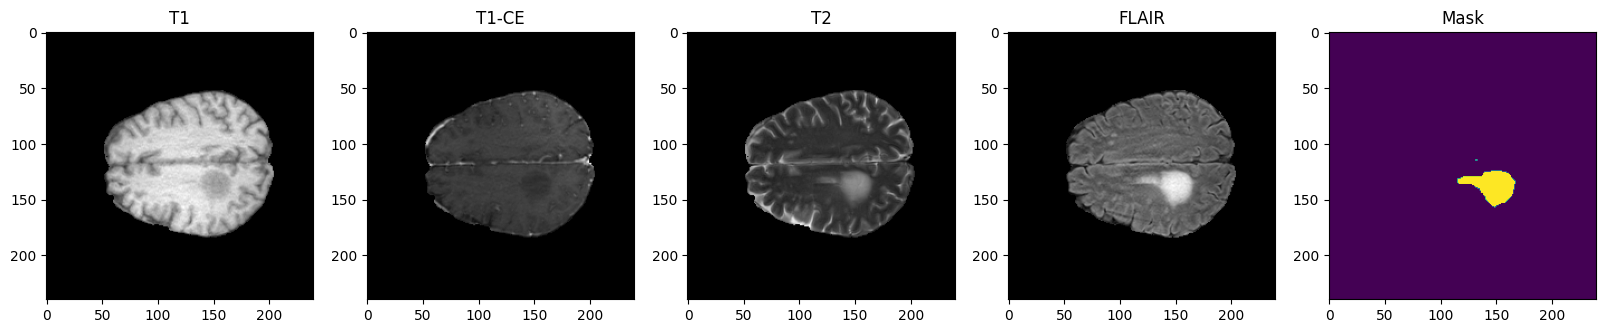

In [10]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20,20))
ax1.imshow(t1[:,:,100],cmap='gray')
ax1.set_title('T1')
ax2.imshow(t1_ce[:,:,100],cmap='gray')
ax2.set_title('T1-CE')
ax3.imshow(t2[:,:,100],cmap='gray')
ax3.set_title('T2')
ax4.imshow(flair[:,:,100],cmap='gray')
ax4.set_title('FLAIR')
ax5.imshow(mask[:,:,100])
ax5.set_title('Mask')

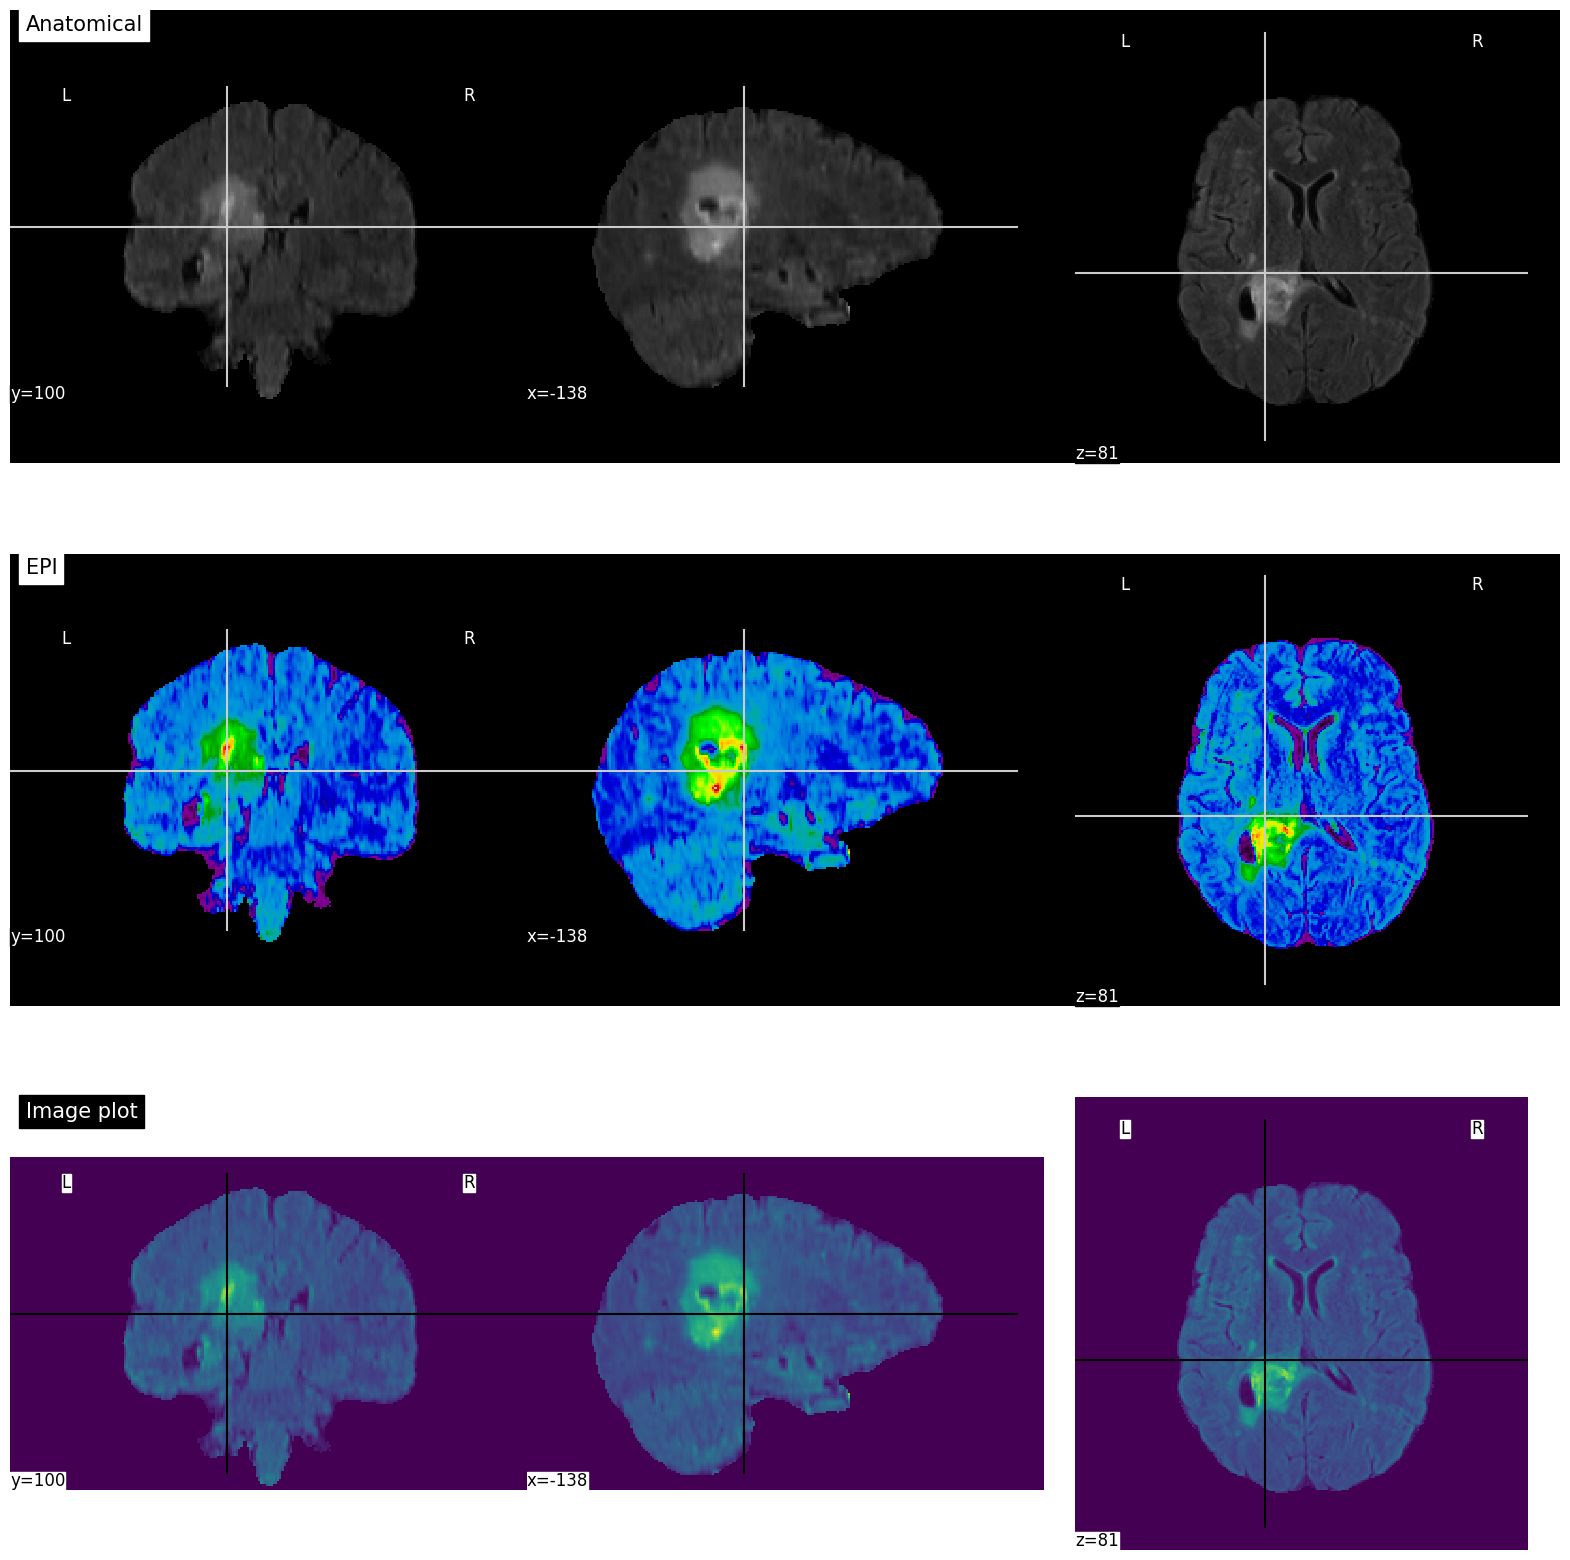

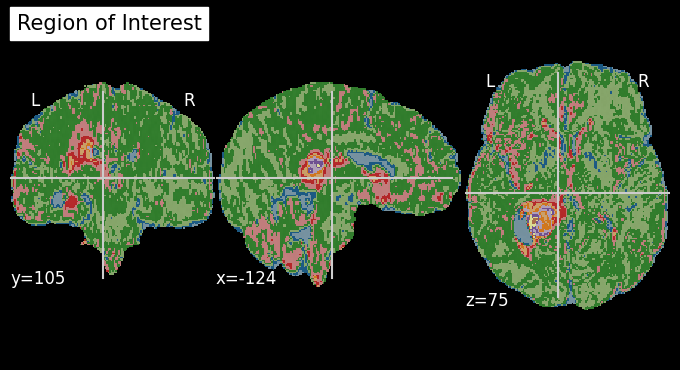

In [11]:
flair_img = nl.image.load_img(train_path + random_dir + '/' + random_file[0])
fig, axes = plt.subplots(nrows=3, figsize=(20,20))

# anatomical
nlplt.plot_anat(flair_img, title='Anatomical', axes=axes[0])

# echo-planar imaging
nlplt.plot_epi(flair_img, title='EPI', axes=axes[1])

# frontal, axial and lateral images
nlplt.plot_img(flair_img, title='Image plot', axes=axes[2])

plt.show()

#roi plot
mask_img = nl.image.load_img(train_path + random_dir + '/' + random_file[0])
nlplt.plot_roi(mask_img,
               title='Region of Interest',
               bg_img=flair_img,
               cmap='Paired')

plt.show()

In [12]:
t1_images = sorted([f for root, dirs, files in os.walk(train_path)
                    for f in glob.glob(os.path.join(root, '*t1.nii'))])
t1ce_images = sorted([f for root, dirs, files in os.walk(train_path)
                    for f in glob.glob(os.path.join(root, '*t1ce.nii'))])
t2_images = sorted([f for root, dirs, files in os.walk(train_path)
                  for f in glob.glob(os.path.join(root, '*t2.nii'))])
flair_images = sorted([f for root, dirs, files in os.walk(train_path)
                     for f in glob.glob(os.path.join(root, '*flair.nii'))])
mask_images = sorted([f for root, dirs, files in os.walk(train_path)
                    for f in glob.glob(os.path.join(root, '*seg.nii'))])

flair_img = nb.load(flair_images[0]).get_fdata()
flair_img.shape

(240, 240, 155)

In [27]:
ROOT='/content/drive/MyDrive/bt_data/'

def create_dir(directory_path):
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)

create_dir(ROOT+'/working/img_data/')
create_dir(ROOT+'/working/mask_data/')
create_dir(ROOT+'/working/val_data/img_data/')
create_dir(ROOT+'/working/val_data/mask_data/')
print('DONE')


from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
mmsc = MinMaxScaler()

num_images =len(t1_images)
print(num_images,' images to be combined. Will stop at 100.')
num_images = 100

for i in range (num_images):
#     t1_img = nb.load(t1_images[i]).get_fdata()
#     t1_img = mmsc.fit_transform(t1_img.reshape(-1,t1_img.shape[-1])).reshape(t1_img.shape)

    t1ce_img = nb.load(t1ce_images[i]).get_fdata()
    t1ce_img = mmsc.fit_transform(t1ce_img.reshape(-1,t1ce_img.shape[-1])).reshape(t1ce_img.shape)

    t2_img = nb.load(t2_images[i]).get_fdata()
    t2_img = mmsc.fit_transform(t2_img.reshape(-1,t2_img.shape[-1])).reshape(t2_img.shape)

    flair_img = nb.load(flair_images[i]).get_fdata()
    flair_img = mmsc.fit_transform(flair_img.reshape(-1,flair_img.shape[-1])).reshape(flair_img.shape)


    mask_img = nb.load(mask_images[i]).get_fdata()
    mask_img = mask_img.astype(np.uint8)
    mask_img[mask_img == 4] = 3


    #combine 3-channel into one image
    comb_img = np.stack([flair_img, t1ce_img, t2_img], axis=-1)

    comb_img = comb_img[56:184,56:184,13:141]
    mask_img = mask_img[56:184,56:184,13:141]

    val,counts = np.unique(mask_img,return_counts=True)

    if i%5==0:
        print(i+5, ' images done.')

    if (1 - (counts[0]/counts.sum()))>0.01:
        mask_img = to_categorical(mask_img,num_classes=4)
        if i%10 ==0:
            np.save(ROOT+'/working/val_data/img_data/image_'+str(i)+'.npy',comb_img)
            np.save(ROOT+'/working/val_data/mask_data/mask_'+str(i)+'.npy',mask_img)
        else:
            np.save(ROOT+'/working/img_data/image_'+str(i)+'.npy',comb_img)
            np.save(ROOT+'/working/mask_data/mask_'+str(i)+'.npy',mask_img)

DONE
369  images to be combined. Will stop at 100.
5  images done.
10  images done.
15  images done.
20  images done.
25  images done.
30  images done.
35  images done.
40  images done.
45  images done.
50  images done.
55  images done.
60  images done.
65  images done.
70  images done.
75  images done.
80  images done.
85  images done.
90  images done.
95  images done.
100  images done.


In [28]:
TRAIN_IMG_PATH = ROOT+'/working/img_data/'
TRAIN_MASK_PATH = ROOT+'/working/mask_data/'
VAL_IMG_PATH = ROOT+'/working/val_data/img_data/'
VAL_MASK_PATH = ROOT+'/working/val_data/mask_data/'

# data augmentation
def load_images(img_dir, img_list):
    images=[]
    for i, img_name in enumerate(img_list):
        if (img_name.split('.')[1] == 'npy'):
            img = np.load(img_dir+img_name)
            images.append(img)
    images = np.array(images)
    return(images)

def image_dataloader(img_dir, img_list, mask_dir, mask_list, batch_size):

    num_img = len(img_list)
    while True:
        b_start = 0
        b_end = batch_size

        while b_start < num_img:
            lim = min(b_end, num_img)
            x = load_images(img_dir, img_list[b_start:lim])
            y = load_images(mask_dir, mask_list[b_start:lim])
            yield (x,y)

            b_start += batch_size
            b_end += batch_size

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 128, 3)]   0         []                            
                                                                                                  
 conv3d_19 (Conv3D)          (None, 128, 128, 128, 16)    1312      ['input_2[0][0]']             
                                                                                                  
 dropout_9 (Dropout)         (None, 128, 128, 128, 16)    0         ['conv3d_19[0][0]']           
                                                                                                  
 conv3d_20 (Conv3D)          (None, 128, 128, 128, 16)    6928      ['dropout_9[0][0]']           
                                                                                            

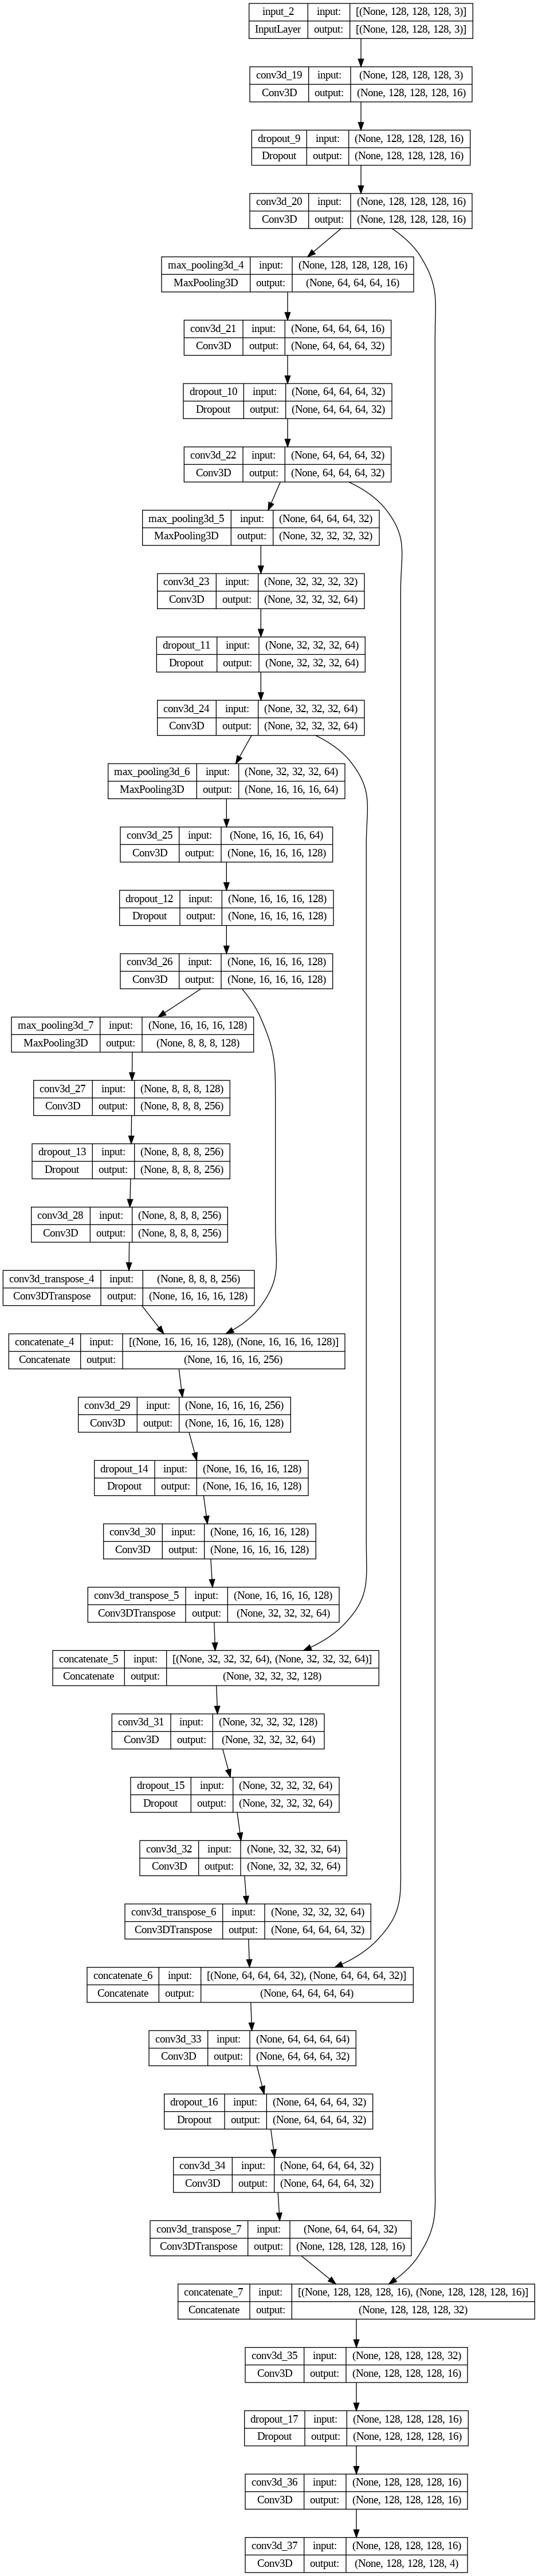

In [29]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Dropout, Conv3DTranspose, concatenate
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

#hparams
ACTIV = 'relu'
KERN_INIT ='he_uniform'
PAD = 'same'

def Unet(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):

    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    s = inputs
    # contract
    c1 = Conv3D(16, (3, 3, 3), activation=ACTIV, kernel_initializer=KERN_INIT, padding=PAD)(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation=ACTIV, kernel_initializer=KERN_INIT, padding=PAD)(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)

    c2 = Conv3D(32, (3, 3, 3), activation=ACTIV, kernel_initializer=KERN_INIT, padding=PAD)(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation=ACTIV, kernel_initializer=KERN_INIT, padding=PAD)(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)

    c3 = Conv3D(64, (3, 3, 3), activation=ACTIV, kernel_initializer=KERN_INIT, padding=PAD)(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation=ACTIV, kernel_initializer=KERN_INIT, padding=PAD)(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)

    c4 = Conv3D(128, (3, 3, 3), activation=ACTIV, kernel_initializer=KERN_INIT, padding=PAD)(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation=ACTIV, kernel_initializer=KERN_INIT, padding=PAD)(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)

    c5 = Conv3D(256, (3, 3, 3), activation=ACTIV, kernel_initializer=KERN_INIT, padding=PAD)(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv3D(256, (3, 3, 3), activation=ACTIV, kernel_initializer=KERN_INIT, padding=PAD)(c5)

    #expand
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding=PAD)(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv3D(128, (3, 3, 3), activation=ACTIV, kernel_initializer=KERN_INIT, padding=PAD)(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv3D(128, (3, 3, 3), activation=ACTIV, kernel_initializer=KERN_INIT, padding=PAD)(c6)

    u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding=PAD)(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv3D(64, (3, 3, 3), activation=ACTIV, kernel_initializer=KERN_INIT, padding=PAD)(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv3D(64, (3, 3, 3), activation=ACTIV, kernel_initializer=KERN_INIT, padding=PAD)(c7)

    u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding=PAD)(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv3D(32, (3, 3, 3), activation=ACTIV, kernel_initializer=KERN_INIT, padding=PAD)(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv3D(32, (3, 3, 3), activation=ACTIV, kernel_initializer=KERN_INIT, padding=PAD)(c8)

    u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding=PAD)(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv3D(16, (3, 3, 3), activation=ACTIV, kernel_initializer=KERN_INIT, padding=PAD)(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv3D(16, (3, 3, 3), activation=ACTIV, kernel_initializer=KERN_INIT, padding=PAD)(c9)

    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

model = Unet(IMG_HEIGHT=128,
              IMG_WIDTH=128,
              IMG_DEPTH=128,
              IMG_CHANNELS=3,
              num_classes=4)
model.summary()
plot_model(model, to_file=ROOT+'unet_arch.png', show_shapes=True, show_layer_names=True)

In [30]:
# training prep
BATCH_SIZE = 2
EPOCHS=10

train_img_list = os.listdir(TRAIN_IMG_PATH)
train_mask_list = os.listdir(TRAIN_MASK_PATH)
val_img_list = os.listdir(VAL_IMG_PATH)
val_mask_list = os.listdir(VAL_MASK_PATH)

STEPS = len(train_img_list) // BATCH_SIZE
VAL_STEPS = len(val_img_list) // BATCH_SIZE

train_img_datagen = image_dataloader(TRAIN_IMG_PATH, train_img_list, TRAIN_MASK_PATH, train_mask_list, BATCH_SIZE)
val_img_datagen = image_dataloader(VAL_IMG_PATH, val_img_list, VAL_MASK_PATH, val_mask_list, BATCH_SIZE)

In [31]:
# loss function and accuracy metric
def dice_coeff(y_true, y_pred):
    smooth = 1e-5
    intersection = K.sum(y_true * y_pred, axis=[1, 2, 3, 4])
    union = K.sum(y_true, axis=[1, 2, 3, 4]) + K.sum(y_pred, axis=[1, 2, 3, 4])
    dice = K.mean((2. * intersection + smooth) / (union + smooth), axis=0)
    return dice

def dice_loss(y_true, y_pred):
    return 1 - dice_coeff(y_true, y_pred)

from tensorflow.keras.optimizers import Adam
OPTIM = Adam(1e-4)
model.compile(optimizer=OPTIM, loss=dice_loss, metrics=[dice_coeff])

In [32]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
      for gpu in gpus:

        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [33]:
history=model.fit(train_img_datagen, epochs=EPOCHS, steps_per_epoch=STEPS, validation_data=val_img_datagen, validation_steps=VAL_STEPS, verbose=1)

Epoch 1/10
40/40 [==============================] - 122s 3s/step - loss: 0.2314 - dice_coeff: 0.7686 - val_loss: 0.0458 - val_dice_coeff: 0.9542
Epoch 2/10
40/40 [==============================] - 54s 1s/step - loss: 0.0381 - dice_coeff: 0.9616 - val_loss: 0.0452 - val_dice_coeff: 0.9548
Epoch 3/10
40/40 [==============================] - 55s 1s/step - loss: 0.0380 - dice_coeff: 0.9617 - val_loss: 0.0452 - val_dice_coeff: 0.9548
Epoch 4/10
40/40 [==============================] - 54s 1s/step - loss: 0.0382 - dice_coeff: 0.9615 - val_loss: 0.0452 - val_dice_coeff: 0.9548
Epoch 5/10
40/40 [==============================] - 52s 1s/step - loss: 0.0383 - dice_coeff: 0.9614 - val_loss: 0.0452 - val_dice_coeff: 0.9548
Epoch 6/10
40/40 [==============================] - 54s 1s/step - loss: 0.0379 - dice_coeff: 0.9618 - val_loss: 0.0452 - val_dice_coeff: 0.9548
Epoch 7/10
40/40 [==============================] - 52s 1s/step - loss: 0.0385 - dice_coeff: 0.9612 - val_loss: 0.0452 - val_dice_coeff

In [35]:
model.save(ROOT+'bt_seg.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


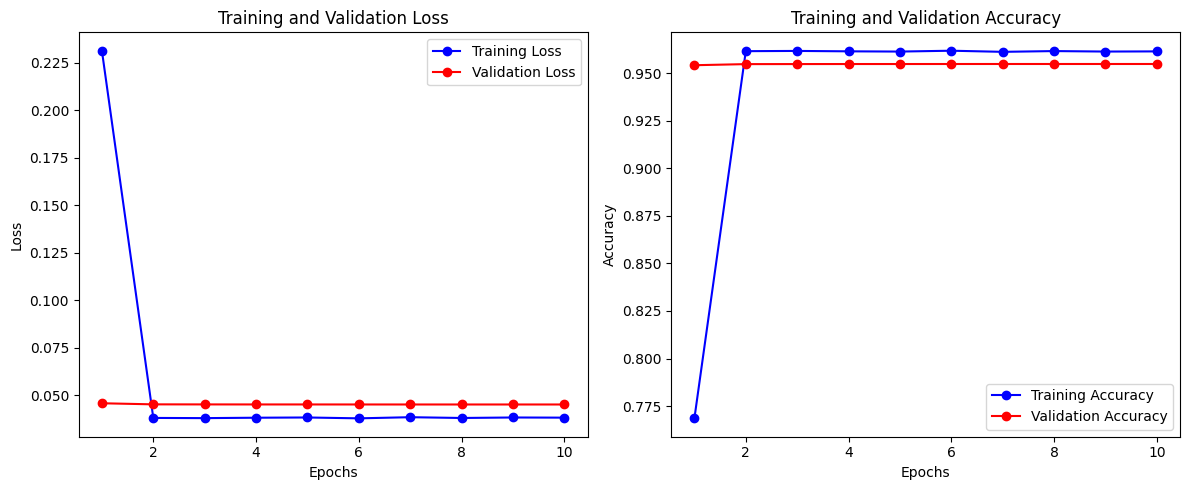

In [36]:
def plot_history(loss, val_loss, acc, val_acc):
    epochs = range(1, len(loss) + 1)

    # loss
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['dice_coeff']
val_acc = history.history['val_dice_coeff']

plot_history(loss, val_loss, acc, val_acc)

1/1 [==============================] - 0s 50ms/step


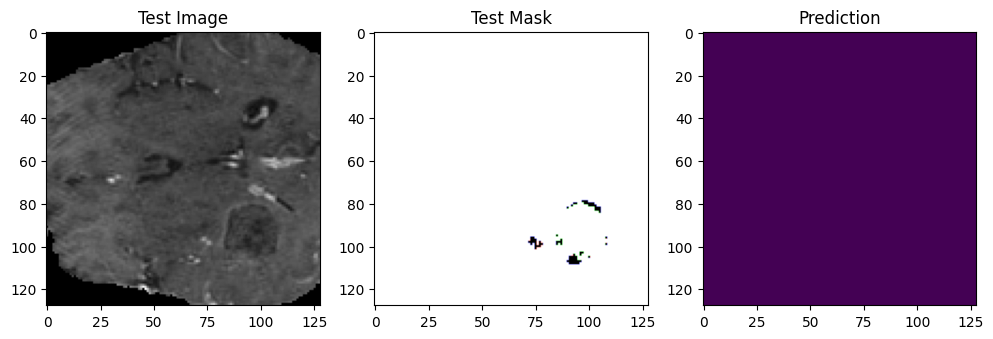

In [44]:
def test_model(test_img, test_mask, model):
    test_img_exp = np.expand_dims(test_img, axis=0)
    test_mask_am = np.argmax(test_mask, axis=3)
    test_pred = model.predict(test_img_exp)
    test_pred = np.argmax(test_pred, axis=4)[0,:,:,:]
    n_slice = 55
    plt.figure(figsize=(12, 8))
    plt.subplot(231)
    plt.title('Test Image')
    plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
    plt.subplot(232)
    plt.title('Test Mask')
    plt.imshow(test_mask[:,:,n_slice],cmap='gray')
    plt.subplot(233)
    plt.title('Prediction')
    plt.imshow(test_pred[:,:, n_slice])
    plt.show()

test_img = np.load(ROOT+'working/img_data/image_57.npy')
test_mask = np.load(ROOT+'working/mask_data/mask_57.npy')
test_model(test_img, test_mask, model)